# Greenspace metrics at scales 100m, 300m, and 500m

In [36]:
import pandas as pd
import scipy as sp
import numpy as np
import rasterio
import os
import geopandas as gpd
import random
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from rasterio.transform import from_origin
from rasterio.plot import show
from shapely.geometry import box, Point, Polygon
from osgeo import gdal
from geopandas import GeoSeries

%matplotlib inline

# 1. NDVI input map

In [2]:
# data dir
data_dir = r"thesis_project/data"
fp = os.path.join(data_dir, "CR_NDVI.TIF")

# open the file
ndvi_input_raster = rasterio.open(fp)

# check type of the variable 'raster'
type(ndvi_input_raster)

rasterio.io.DatasetReader

In [3]:
# check metadata for the whole raster dataset
ndvi_input_raster.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.3999999521443642e+38,
 'width': 7443,
 'height': 5987,
 'count': 1,
 'crs': CRS.from_epsg(27700),
 'transform': Affine(10.0, 0.0, 341660.6724,
        0.0, -10.0, 431034.6389)}

In [4]:
ndvi_input_raster.bounds

BoundingBox(left=341660.6724, bottom=371164.6389, right=416090.6724, top=431034.6389)

In [5]:
# read the raster band as separate variable
ndvi_input = ndvi_input_raster.read(1)
type(ndvi_input)

numpy.ndarray

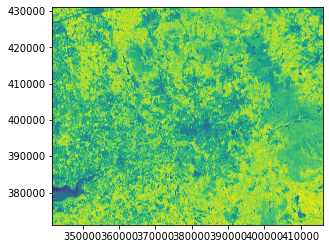

<AxesSubplot:>

In [6]:
# plot input NDVI
show(ndvi_input_raster, 1)

# 2. Focal statistics

### 2.1. Focal statistics at 100m

In [7]:
# design kernel at a 100m scale
scale_100 = np.ones((21, 21))
scale_100.shape

(21, 21)

In [8]:
# convolve NDVI input with kernel at 100m (equivalent to average operation)
ndvi_output_100 = convolve(ndvi_input, scale_100) / np.sum(scale_100) # mode=reflect to extend input beyond its boundaries
ndvi_output_100.shape

(5987, 7443)

### 2.2. Focal statistics at 300m

In [9]:
# design kernel at a 300m scale
scale_300 = np.ones((61, 61))
scale_300.shape

(61, 61)

In [10]:
# convolve NDVI input with kernel at 300m (equivalent to average operation)
ndvi_output_300 = convolve(ndvi_input, scale_300) / np.sum(scale_300) # mode=reflect to extend input beyond its boundaries
ndvi_output_300.shape

(5987, 7443)

### 2.3. Focal statistics at 500m

In [11]:
# design kernel at a 500m scale
scale_500 = np.ones((101, 101))
scale_500.shape

(101, 101)

In [12]:
# convolve NDVI input with kernel at 500m (equivalent to average operation)
ndvi_output_500 = convolve(ndvi_input, scale_500) / np.sum(scale_500) # mode=reflect to extend input beyond its boundaries
ndvi_output_500.shape

(5987, 7443)

# 3. NDVI output layer

### 3.1. NDVI output layer at 100m

In [13]:
# convert NDVI output to raster image
transform = from_origin(341660.6724, 431034.6389, 10.0, 10.0) #output (top-left)


new_dataset = rasterio.open('thesis_project/output/ndvi_output_100.tif', 'w', driver='GTiff',
                            height = ndvi_output_100.shape[0], width = ndvi_output_100.shape[1],
                            count=1, dtype=str(ndvi_output_100.dtype),
                            crs='+proj=tmerc +lat_0=49 +lon_0=-2 +k=0.9996012717 +x_0=400000 +y_0=-100000 +ellps=airy +towgs84=446.448,-125.157,542.06,0.15,0.247,0.842,-20.489 +units=m +no_defs',
                            transform=transform)

new_dataset.write(ndvi_output_100, 1)
new_dataset.close()

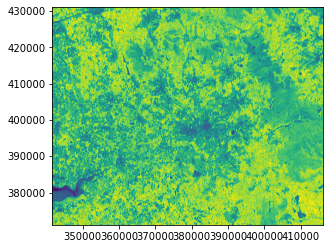

<AxesSubplot:>

In [14]:
# NDVI layer output at 100m
src_100 = rasterio.open("thesis_project/output/ndvi_output_100.tif")
show(src_100, 1)

In [15]:
# output layer metadata
src_100.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 7443,
 'height': 5987,
 'count': 1,
 'crs': CRS.from_epsg(27700),
 'transform': Affine(10.0, 0.0, 341660.6724,
        0.0, -10.0, 431034.6389)}

In [16]:
# check crs
src_100.crs

CRS.from_epsg(27700)

### 3.2. NDVI output layer at 300m

In [17]:
# convert NDVI output to raster image
transform = from_origin(341660.6724, 431034.6389, 10.0, 10.0) #output (top-left)


new_dataset = rasterio.open('thesis_project/output/ndvi_output_300.tif', 'w', driver='GTiff',
                            height = ndvi_output_300.shape[0], width = ndvi_output_300.shape[1],
                            count=1, dtype=str(ndvi_output_300.dtype),
                            crs='+proj=tmerc +lat_0=49 +lon_0=-2 +k=0.9996012717 +x_0=400000 +y_0=-100000 +ellps=airy +towgs84=446.448,-125.157,542.06,0.15,0.247,0.842,-20.489 +units=m +no_defs',
                            transform=transform)

new_dataset.write(ndvi_output_300, 1)
new_dataset.close()

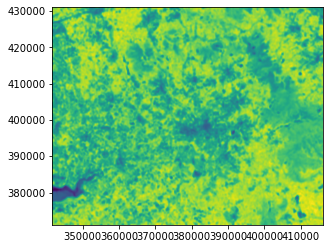

<AxesSubplot:>

In [18]:
# NDVI layer output at 300m
src_300 = rasterio.open("thesis_project/output/ndvi_output_300.tif")
show(src_300, 1)

In [19]:
# check crs
src_300.crs

CRS.from_epsg(27700)

### 3.3. NDVI output layer at 500m

In [20]:
# convert NDVI output to raster image
transform = from_origin(341660.6724, 431034.6389, 10.0, 10.0) #output (top-left)

new_dataset = rasterio.open('thesis_project/output/ndvi_output_500.tif', 'w', driver='GTiff',
                            height = ndvi_output_500.shape[0], width = ndvi_output_500.shape[1],
                            count=1, dtype=str(ndvi_output_500.dtype),
                            crs='+proj=tmerc +lat_0=49 +lon_0=-2 +k=0.9996012717 +x_0=400000 +y_0=-100000 +ellps=airy +towgs84=446.448,-125.157,542.06,0.15,0.247,0.842,-20.489 +units=m +no_defs',
                            transform=transform)

new_dataset.write(ndvi_output_500, 1)
new_dataset.close()

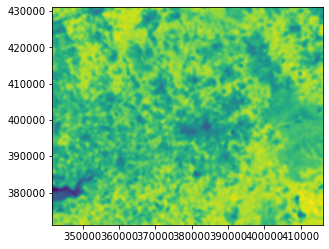

<AxesSubplot:>

In [21]:
# NDVI layer output at 500m
src_500 = rasterio.open("thesis_project/output/ndvi_output_500.tif")
show(src_500, 1)

In [22]:
# check crs
src_500.crs

CRS.from_epsg(27700)

# 4. Generate random points within extent of raster

### 4.1. Generate random points at 100m from each other

In [23]:
# extract raster bounds (later input to create the polygon)
bounds = src_100.bounds
bounds

BoundingBox(left=341660.6724, bottom=371164.6389, right=416090.6724, top=431034.6389)

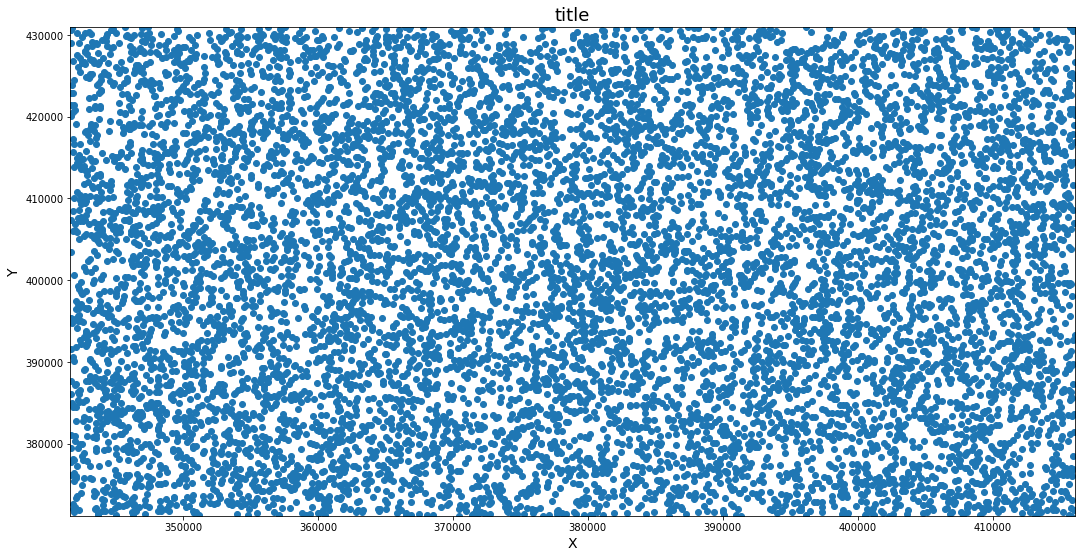

In [58]:
# generate random points at 100m from each other
plt.close("all")

a = 416090.6724         # x bound
b = 431034.6389        # y bound

N = 10000        # number of points

def distance(p, points, min_distance):
    """
    Determines if any points in the list are less than the minimum specified 
    distance apart.

    Parameters
    ----------
    p : tuple
        `(x,y)` point.
    points : ndarray
        Array of points to check against. `x, y` points are columnwise.
    min_distance : float
        Minimum allowable distance between any two points.

    Returns
    -------
    bool
        True if point `p` is at least `min_distance` from all points in `points`.

    """
#    distances = np.sqrt(np.sum((p+points)**2, axis=1)) # generated points less than min distance
    distances = np.sqrt(np.sum(np.square(p-points), axis=1)) # added euclidean distance formula
    distances = np.where(distances < min_distance)
    return distances[0].size < 1

points_100 = np.array([])       # x, y columnwise
while points_100.shape[0] < 10000:
    x = random.choice(np.linspace(341660.6724, a, 100000))
    y = random.choice(np.linspace(371164.6389, b, 100000))
    p = (x,y)
    if len(points_100) == 0:                # add first point blindly
        points_100 = np.array([p])
    elif distance(p, points_100, 100):     # ensure the minimum distance is met
        points_100 = np.vstack((points_100, p))
        
fig = plt.figure(figsize=(18,9))
ax = plt.axes(projection=None)
ax.set_xlim([341660.6724, a])
ax.set_ylim([371164.6389, b])
ax.set_title('title',fontsize=18)
ax.set_xlabel('X',fontsize=14)
ax.set_ylabel('Y',fontsize=14)
ax.scatter(points_100[:,0], points_100[:,1])

In [67]:
# convert np array to point geometry
x, y = np.split(points_100,[-1],axis=1) # split array into x and y
sample_100 = GeoSeries(map(Point, zip(x, y)))
sample_100

0       POINT (401020.680 393972.942)
1       POINT (410531.440 421209.275)
2       POINT (359195.811 388215.785)
3       POINT (404500.317 396719.805)
4       POINT (404523.390 388489.394)
                    ...              
9995    POINT (399733.772 397860.939)
9996    POINT (392558.648 398773.367)
9997    POINT (404643.224 406466.140)
9998    POINT (347953.792 402287.172)
9999    POINT (375659.148 374596.422)
Length: 10000, dtype: geometry

In [68]:
# convert list of point geometries to geodataframe
df_100 = pd.DataFrame(sample_100, columns=['geometry'])
gdf_100 = gpd.GeoDataFrame(df_100, geometry='geometry', crs = 'epsg:27700')
gdf_100.head()                      


,geometry
0,POINT (401020.680 393972.942)
1,POINT (410531.440 421209.275)
2,POINT (359195.811 388215.785)
3,POINT (404500.317 396719.805)
4,POINT (404523.390 388489.394)


In [69]:
# save gpd into shapefile
gdf_100.to_file(driver = 'ESRI Shapefile', filename= "thesis_project/output/sample_points_100.shp")

/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [62]:
# obtain point coordinates (x, y) from point geometry (x y) to later extract raster values
point_coords = []
for index, row in gdf_100.iterrows():
     for pt in list(row['geometry'].coords): 
        point_coords.append(pt)
#print(point_coords)

# add point coordinates to geodataframe
gdf_100['point_coordinates'] = point_coords
gdf_100.head()

,geometry,point_coordinates
0,POINT (401020.680 393972.942),"(401020.679600072, 393972.94218303286)"
1,POINT (410531.440 421209.275),"(410531.4401076771, 421209.2749463605)"
2,POINT (359195.811 388215.785),"(359195.8114513905, 388215.78541146516)"
3,POINT (404500.317 396719.805),"(404500.31689644494, 396719.80525166355)"
4,POINT (404523.390 388489.394),"(404523.3904271803, 388489.3940475515)"


### 4.2. Generate random points at 300m from each other

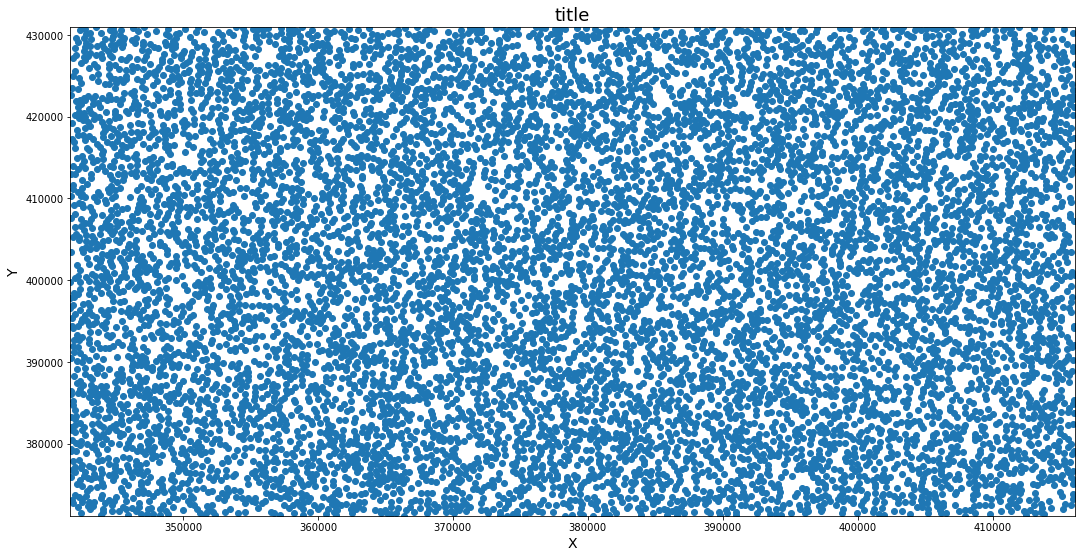

In [70]:
# generate random points at 300m from each other
plt.close("all")

a = 416090.6724         # x bound
b = 431034.6389        # y bound

N = 10000        # number of points

def distance(p, points, min_distance):
    """
    Determines if any points in the list are less than the minimum specified 
    distance apart.

    Parameters
    ----------
    p : tuple
        `(x,y)` point.
    points : ndarray
        Array of points to check against. `x, y` points are columnwise.
    min_distance : float
        Minimum allowable distance between any two points.

    Returns
    -------
    bool
        True if point `p` is at least `min_distance` from all points in `points`.

    """
#    distances = np.sqrt(np.sum((p+points)**2, axis=1)) # generated points less than min distance
    distances = np.sqrt(np.sum(np.square(p-points), axis=1)) # added euclidean distance formula
    distances = np.where(distances < min_distance)
    return distances[0].size < 1

points_300 = np.array([])       # x, y columnwise
while points_300.shape[0] < 10000:
    x = random.choice(np.linspace(341660.6724, a, 100000))
    y = random.choice(np.linspace(371164.6389, b, 100000))
    p = (x,y)
    if len(points_300) == 0:                # add first point blindly
        points_300 = np.array([p])
    elif distance(p, points_300, 300):     # ensure the minimum distance is met
        points_300 = np.vstack((points_300, p))
        
fig = plt.figure(figsize=(18,9))
ax = plt.axes(projection=None)
ax.set_xlim([341660.6724, a])
ax.set_ylim([371164.6389, b])
ax.set_title('title',fontsize=18)
ax.set_xlabel('X',fontsize=14)
ax.set_ylabel('Y',fontsize=14)
ax.scatter(points_300[:,0], points_300[:,1])

In [71]:
# convert np array to point geometry
x, y = np.split(points_300,[-1],axis=1) # split array into x and y
sample_300 = GeoSeries(map(Point, zip(x, y)))

# convert list of point geometries to geodataframe
df_300 = pd.DataFrame(sample_300, columns=['geometry'])
gdf_300 = gpd.GeoDataFrame(df_300, geometry='geometry', crs = 'epsg:27700')

# save gpd into shapefile
gdf_300.to_file(driver = 'ESRI Shapefile', filename= "thesis_project/output/sample_points_300.shp")


/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [72]:
# obtain point coordinates (x, y) from point geometry (x y) to later extract raster values
point_coords = []
for index, row in gdf_300.iterrows():
     for pt in list(row['geometry'].coords): 
        point_coords.append(pt)
#print(point_coords)

# add point coordinates to geodataframe
gdf_300['point_coordinates'] = point_coords
gdf_300.head()

,geometry,point_coordinates
0,POINT (398572.652 409697.356),"(398572.6524198002, 409697.3562271733)"
1,POINT (363230.702 397368.803),"(363230.70210029697, 397368.80254163645)"
2,POINT (380925.123 389582.032),"(380925.1229445054, 389582.03247393575)"
3,POINT (408050.663 404778.388),"(408050.66339991, 404778.38783748937)"
4,POINT (395016.351 427694.458),"(395016.3514567906, 427694.458198193)"


### 4.3. Generate random points at 500m from each other

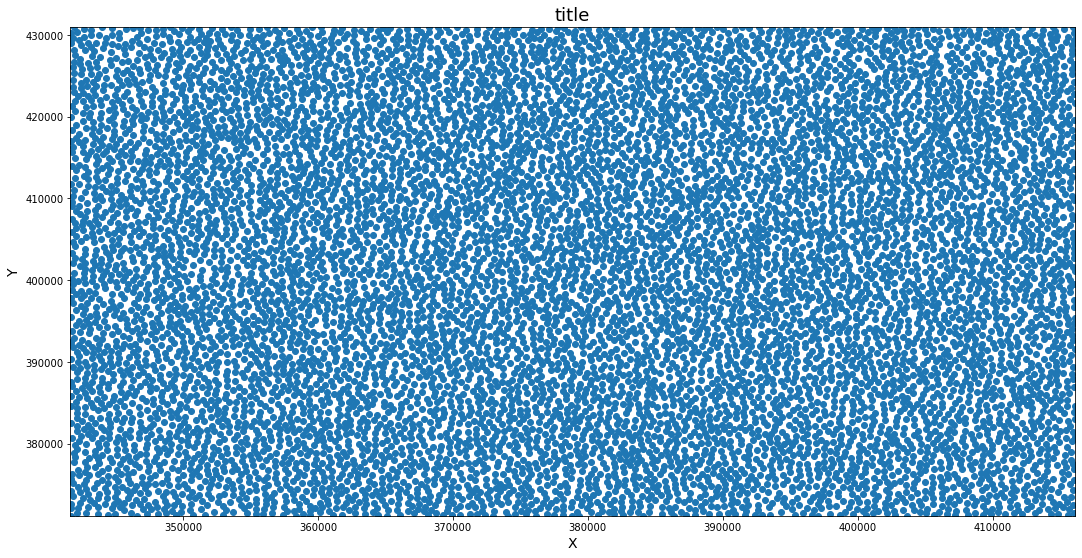

In [73]:
# generate random points at 500m from each other
plt.close("all")

a = 416090.6724         # x bound
b = 431034.6389        # y bound

N = 10000        # number of points

def distance(p, points, min_distance):
    """
    Determines if any points in the list are less than the minimum specified 
    distance apart.

    Parameters
    ----------
    p : tuple
        `(x,y)` point.
    points : ndarray
        Array of points to check against. `x, y` points are columnwise.
    min_distance : float
        Minimum allowable distance between any two points.

    Returns
    -------
    bool
        True if point `p` is at least `min_distance` from all points in `points`.

    """
#    distances = np.sqrt(np.sum((p+points)**2, axis=1)) # generated points less than min distance
    distances = np.sqrt(np.sum(np.square(p-points), axis=1)) # added euclidean distance formula
    distances = np.where(distances < min_distance)
    return distances[0].size < 1

points_500 = np.array([])       # x, y columnwise
while points_500.shape[0] < 10000:
    x = random.choice(np.linspace(341660.6724, a, 100000))
    y = random.choice(np.linspace(371164.6389, b, 100000))
    p = (x,y)
    if len(points_500) == 0:                # add first point blindly
        points_500 = np.array([p])
    elif distance(p, points_500, 500):     # ensure the minimum distance is met
        points_500 = np.vstack((points_500, p))
        
fig = plt.figure(figsize=(18,9))
ax = plt.axes(projection=None)
ax.set_xlim([341660.6724, a])
ax.set_ylim([371164.6389, b])
ax.set_title('title',fontsize=18)
ax.set_xlabel('X',fontsize=14)
ax.set_ylabel('Y',fontsize=14)
ax.scatter(points_500[:,0], points_500[:,1])

In [74]:
# convert np array to point geometry
x, y = np.split(points_500,[-1],axis=1) # split array into x and y
points_500 = GeoSeries(map(Point, zip(x, y)))

# convert list of point geometries to geodataframe
df_500 = pd.DataFrame(points_500, columns=['geometry'])
gdf_500 = gpd.GeoDataFrame(df_500, geometry='geometry', crs = 'epsg:27700')

# save gpd into shapefile
gdf_500.to_file(driver = 'ESRI Shapefile', filename= "thesis_project/output/sample_points_500.shp")



/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [75]:
# obtain point coordinates (x, y) from point geometry (x y) to later extract raster values
point_coords = []
for index, row in gdf_500.iterrows():
     for pt in list(row['geometry'].coords): 
        point_coords.append(pt)
#print(point_coords)

# add point coordinates to geodataframe
gdf_500['point_coordinates'] = point_coords
gdf_500.head()

,geometry,point_coordinates
0,POINT (414621.410 386433.438),"(414621.409507371, 386433.4376879879)"
1,POINT (348251.515 381679.113),"(348251.51480842405, 381679.1134447455)"
2,POINT (360156.712 387863.148),"(360156.7123603996, 387863.1475850869)"
3,POINT (374647.634 407503.099),"(374647.6339696157, 407503.0987845989)"
4,POINT (374142.994 406003.340),"(374142.9935232112, 406003.3402870139)"


# 5. Extract raster values at point locations and store them into a Geodataframe

### 5.1. NDVI values at 100m

In [63]:
# open the raster and store metadata
src_100 = rasterio.open("thesis_project/output/ndvi_output_100.tif")

# sample the raster at every point location and store values in Geodataframe
gdf_100['NDVI_100'] = [x[0] for x in src_100.sample(gdf_100.point_coordinates)]
gdf_100.head()

,geometry,point_coordinates,NDVI_100
0,POINT (401020.680 393972.942),"(401020.679600072, 393972.94218303286)",0.619719
1,POINT (410531.440 421209.275),"(410531.4401076771, 421209.2749463605)",0.351096
2,POINT (359195.811 388215.785),"(359195.8114513905, 388215.78541146516)",0.413043
3,POINT (404500.317 396719.805),"(404500.31689644494, 396719.80525166355)",0.532474
4,POINT (404523.390 388489.394),"(404523.3904271803, 388489.3940475515)",0.536370


In [65]:
# type of dataframe
type(gdf_100)

geopandas.geodataframe.GeoDataFrame

### 5.2. NDVI values at 300m

In [76]:
# open the raster and store metadata
src_300 = rasterio.open("thesis_project/output/ndvi_output_300.tif")

# sample the raster at every point location and store values in Geodataframe
gdf_300['NDVI_300'] = [x[0] for x in src_300.sample(gdf_300.point_coordinates)]
gdf_300.head()

,geometry,point_coordinates,NDVI_300
0,POINT (398572.652 409697.356),"(398572.6524198002, 409697.3562271733)",0.618782
1,POINT (363230.702 397368.803),"(363230.70210029697, 397368.80254163645)",0.403204
2,POINT (380925.123 389582.032),"(380925.1229445054, 389582.03247393575)",0.556312
3,POINT (408050.663 404778.388),"(408050.66339991, 404778.38783748937)",0.432287
4,POINT (395016.351 427694.458),"(395016.3514567906, 427694.458198193)",0.650094


### 5.3. NDVI values at 500m

In [77]:
# open the raster and store metadata
src_500 = rasterio.open("thesis_project/output/ndvi_output_500.tif")

# sample the raster at every point location and store values in Geodataframe
gdf_500['NDVI_500'] = [x[0] for x in src_500.sample(gdf_500.point_coordinates)]
gdf_500.head()

,geometry,point_coordinates,NDVI_500
0,POINT (414621.410 386433.438),"(414621.409507371, 386433.4376879879)",0.630315
1,POINT (348251.515 381679.113),"(348251.51480842405, 381679.1134447455)",0.142873
2,POINT (360156.712 387863.148),"(360156.7123603996, 387863.1475850869)",0.234041
3,POINT (374647.634 407503.099),"(374647.6339696157, 407503.0987845989)",0.517496
4,POINT (374142.994 406003.340),"(374142.9935232112, 406003.3402870139)",0.351261


### How to directly convert raster image to point shapefile

In [ ]:
# convert raster to point shapefile
filename='thesis_project/output/ndvi_output_100'
inDs = gdal.Open('{}.tif'.format(filename))
outDs = gdal.Translate('{}.xyz'.format(filename), inDs, format='XYZ', creationOptions=["ADD_HEADER_LINE=YES"])
outDs = None
try:
    os.remove('{}.csv'.format(filename))
except OSError:
    pass
os.rename('{}.xyz'.format(filename), '{}.csv'.format(filename))
os.system('ogr2ogr -f "ESRI Shapefile" -oo X_POSSIBLE_NAMES=X* -oo Y_POSSIBLE_NAMES=Y* -oo KEEP_GEOM_COLUMNS=NO {0}.shp {0}.csv'.format(filename))

In [ ]:
len(gdf_ndvi_100)

In [ ]:
# randomly sample 10000 point locations
gdf_ndvi_100 = gdf_ndvi_100.sample(n = 10000)
gdf_ndvi_100 = gdf_ndvi_100.reset_index(drop=True)
gdf_ndvi_100.head()

In [ ]:
# plot gpd
#gdf_ndvi_100.plot()
type(gdf_ndvi_100)

In [ ]:
# save gpd into shapefile
gdf_ndvi_100.to_file(driver = 'ESRI Shapefile', filename= "thesis_project/output/gdf_ndvi_100_sample.shp")


### Draft

In [ ]:
# creating shapely polygon from raster boundaries (later input to generate_random function)
polygon_geom = Polygon([[341660.6724,490904.6389],
                        [341660.6724,431034.6389],
                        [416090.672,431034.6389],
                        [416090.672,490904.639],
                        [341660.6724, 490904.6389]])
type(polygon_geom)

In [ ]:
# function to generate random point coordinates within raster bounds
def generate_random(number, polygon):
    points = []
    minx, miny, maxx, maxy = polygon.bounds
    while len(points) < number:
        pnt = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if polygon.contains(pnt):
            points.append(pnt)
    return points

In [ ]:
# Step 1: Get input %Greenness
# data dir
#data_dir = r"thesis_project/data"
fp_green = os.path.join(data_dir, "GreenNoGreenRes.TIF")

# open the file:
green_input_raster = rasterio.open(fp_green)

# check type of the variable 'raster'
type(green_input_raster)

In [ ]:
# All Metadata for the whole raster dataset
green_input_raster.meta

In [ ]:
# create NDVI layers at three different scales (100m, 300m, and 500m)
scales = [21, 61, 101]
#scales = [21]

#ndvi_outputs = []
greenspace_dfs = []

for scale in scales:
    
    kernel = np.ones((scale, scale)) # build kernel 
    ndvi_output = (convolve(ndvi_input_arr, kernel) / np.sum(kernel)).ravel() # convert to 1d array
    greenspace_df = pd.DataFrame(ndvi_output, columns=['NDVI']) # create df
    greenspace_dfs.append(greenspace_df) # append to df list

#    ndvi_outputs.append(ndvi_output)
    
#print(len(ndvi_outputs))
print(len(greenspace_dfs))

In [ ]:
# data frame NDVI at 100m
greenspace_df_100 = greenspace_dfs[0]
greenspace_df_100.head()

In [ ]:
# data frame NDVI at 300m
greenspace_df_300 = greenspace_dfs[1]
greenspace_df_300.head()

In [ ]:
# data frame NDVI at 500m
greenspace_df_500 = greenspace_dfs[2]
greenspace_df_500.head()

In [ ]:
ndvi_output_100.shape

In [ ]:
# check sum of kernel (denominator of average operation)
np.sum(scale_100)

In [ ]:
# output map of averaged neighbour
#output_map_100
ndvi_output_100.shape

In [ ]:
ndvi_output_100_1d = ndvi_output_100.ravel()
ndvi_output_100_1d.shape

In [ ]:
# randomly sample 1000 points from 2d array
np.random.seed(1234) #set seed
ndvi_points_100 = np.random.choice(ndvi_output_100.ravel(), 1000 ,replace=False)
ndvi_points_100

5. Store NDVI values for 1000 points into a df

In [ ]:
# creating a df from array
greenspace_metrics_100 = pd.DataFrame(ndvi_points_100, columns=['NDVI'])
#greenspace_metrics_100.head()
greenspace_metrics_100

Here, repeat again the same process but with %greenness

6. Read %Greenness input file

In [ ]:
# reading raster file using gdal
green_input_map = gdal.Open("thesis_project/data/GreenNoGreenRes.tif")

7. Applying focal statistics to %greenness input map at 100m scale

In [ ]:
# convert input map to array
green_input_arr = np.array(green_input_map.GetRasterBand(1).ReadAsArray())
#green_input_arr
green_input_arr.shape

In [ ]:
# fix kernel shape to 100m scale (21x21)
scale_100 = np.ones((21, 21))
#scale_100
scale_100.shape

In [ ]:
# convolve greenness input map with kernel 100m (equivalent to percentage operation)
green_output_100 = convolve(green_input_arr, scale_100) / np.sum(scale_100) # mode=reflect to extend input beyond its boundaries


8. Output layer averaged at 100m scale

In [ ]:
# greenness output map after performing focal statistics
green_output_100
#green_output_100.shape

10. Store %greenness values for 1000 points into a df

In [ ]:
# adding values to data frame
greenspace_metrics_100['%Greenness'] = green_points_100
#greenspace_metrics_100.head()
greenspace_metrics_100

9. Sample 1000 points and extract %greenness values

In [ ]:
# randomly sample 1000 points
np.random.seed(2345) #set seed
green_points_100 = np.random.choice(green_output_100.ravel(), 1000 ,replace=False)
green_points_100